In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# Import boston housing data
housing_df = pd.read_csv('boston_housing.csv')

In [4]:
# Display null value
housing_df.isnull().sum()

CRIM             1
ZN               3
INDUS            2
CHAS             0
NOX              2
RM               0
AGE              0
DIS              1
RAD              6
TAX              0
PTRATIO          0
B                0
LSTAT            0
MEDV             0
Unnamed: 14    506
dtype: int64

In [5]:
# Display total missing value
housing_df.isnull().sum().sum()

521

In [6]:
housing_df.shape

(506, 15)

In [7]:
whole_df = housing_df.dropna(axis=1, how='all')

In [8]:
whole_df.shape

(506, 14)

In [9]:
# Highlight missing values
highlighted_null = whole_df.style.highlight_null(null_color = 'yellow')

C:\Users\hazel\AppData\Local\Temp\ipykernel_29516\845250464.py:2: FutureWarning: `null_color` is deprecated: use `color` instead
  highlighted_null = whole_df.style.highlight_null(null_color = 'yellow')


In [10]:
highlighted_null

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006320,18.000000,2.310000,0,0.538000,6.575000,65.200000,4.090000,1.000000,296,15.300000,396.900000,4.980000,24.000000
1,0.027310,0.000000,7.070000,0,0.469000,6.421000,78.900000,4.967100,2.000000,242,17.800000,396.900000,9.140000,21.600000
2,0.027290,0.000000,7.070000,0,0.469000,7.185000,61.100000,4.967100,2.000000,242,17.800000,392.830000,4.030000,34.700000
3,0.032370,0.000000,2.180000,0,0.458000,6.998000,45.800000,6.062200,3.000000,222,18.700000,394.630000,2.940000,33.400000
4,0.069050,0.000000,2.180000,0,0.458000,7.147000,54.200000,6.062200,3.000000,222,18.700000,396.900000,5.330000,36.200000
5,0.029850,0.000000,2.180000,0,0.458000,6.430000,58.700000,6.062200,3.000000,222,18.700000,394.120000,5.210000,28.700000
6,0.088290,12.500000,7.870000,0,0.524000,6.012000,66.600000,5.560500,5.000000,311,15.200000,395.600000,12.430000,22.900000
7,0.144550,12.500000,7.870000,0,0.524000,6.172000,96.100000,5.950500,5.000000,311,15.200000,396.900000,19.150000,27.100000
8,0.211240,nan,7.870000,0,0.524000,5.631000,100.000000,6.082100,5.000000,311,15.200000,386.630000,29.930000,16.500000
9,0.170040,12.500000,7.870000,0,0.524000,6.004000,85.900000,6.592100,5.000000,311,16.000000,386.710000,17.100000,18.900000


In [11]:
# Display statistical summary of data
whole_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,503.000000,504.000000,506.000000,504.000000,506.000000,506.000000,505.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.617931,11.301193,11.151111,0.069170,0.554876,6.284634,68.574901,3.793736,9.618000,408.237154,18.700000,356.674032,12.653063,22.532806
std,8.609502,23.372189,6.870080,0.253994,0.115983,0.702617,28.148861,2.107593,8.736173,168.537116,3.668199,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,2.000000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.175000,0.000000,0.449000,5.885500,45.025000,2.100000,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.199200,5.000000,330.000000,19.100000,391.440000,11.360000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.211900,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,55.400000,396.900000,37.970000,50.000000


In [12]:
# Replace misssing values with mean of each column
housing_df_filled = whole_df.fillna(whole_df.mean())

In [13]:
# Export filled table
housing_df_filled.to_excel('filled_data.xlsx', index=False)

In [14]:
# Highlight filled values in the filled table
def highlight_cells(val):
    target_values = [3.617931, 11.301193, 11.151111, 0.554876, 3.793736, 9.618000]
    for target in target_values:
        if np.isclose(val, target):
            return 'background-color: yellow'
    return ''
highlighted_filledData = housing_df_filled.style.applymap(highlight_cells)

In [15]:
# Export the highlighted filled talbe with means in cells
highlighted_filledData.to_excel('highlighted_filledData.xlsx', engine='openpyxl', index=False)

In [16]:
# Check the number of missing values after filling the table
housing_df_filled.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: xlabel='PTRATIO'>

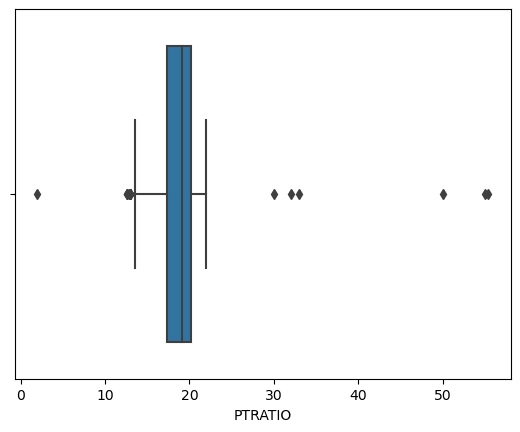

In [17]:
# Draw box plot to check outliers
sns.boxplot(x = whole_df['PTRATIO'])

In [25]:
# Substitute missing values with "NaN"
missing_val = ['NaN']
housing_df1 = whole_df.replace(missing_val, np.nan)

In [26]:
# Check instances of row 81
housing_df1.iloc[81:82, 1:15]

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
81,NaN,4.86,0,0.426,6.619,70.4,5.4007,4.0,281,19.0,395.63,7.22,23.9


In [27]:
# Check shape of data before omission
housing_df1.shape

(506, 14)

In [28]:
# Conduct omission
cleaned_df = housing_df1.dropna()

In [29]:
# Check shape of data after omission
cleaned_df.shape

(491, 14)

In [30]:
# Exported the cleaned data
cleaned_df.to_excel('cleaned_df.xlsx', engine='openpyxl', index=False)

(array([372.,  40.,  26.,  22.,  15.,   7.,   7.,   3.,   4.,   1.,   0.,
          0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([6.32000000e-03, 2.97198267e+00, 5.93764533e+00, 8.90330800e+00,
        1.18689707e+01, 1.48346333e+01, 1.78002960e+01, 2.07659587e+01,
        2.37316213e+01, 2.66972840e+01, 2.96629467e+01, 3.26286093e+01,
        3.55942720e+01, 3.85599347e+01, 4.15255973e+01, 4.44912600e+01,
        4.74569227e+01, 5.04225853e+01, 5.33882480e+01, 5.63539107e+01,
        5.93195733e+01, 6.22852360e+01, 6.52508987e+01, 6.82165613e+01,
        7.11822240e+01, 7.41478867e+01, 7.71135493e+01, 8.00792120e+01,
        8.30448747e+01, 8.60105373e+01, 8.89762000e+01]),
 <BarContainer object of 30 artists>)

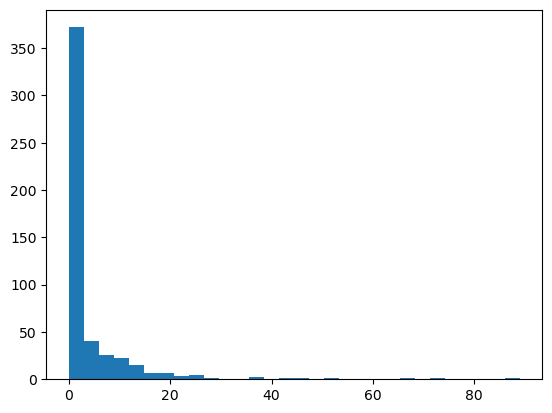

In [33]:
# Check normality of Column 'CRIM'
plt.hist(whole_df['CRIM'], bins=30)

(array([372.,   0.,   0.,   9.,   0.,   2.,  35.,   9.,   2.,  10.,   6.,
          0.,   7.,   6.,   0.,   3.,   3.,   0.,   4.,   0.,   0.,   3.,
          3.,   0.,  17.,   2.,   0.,   5.,   4.,   1.]),
 array([  0.        ,   3.33333333,   6.66666667,  10.        ,
         13.33333333,  16.66666667,  20.        ,  23.33333333,
         26.66666667,  30.        ,  33.33333333,  36.66666667,
         40.        ,  43.33333333,  46.66666667,  50.        ,
         53.33333333,  56.66666667,  60.        ,  63.33333333,
         66.66666667,  70.        ,  73.33333333,  76.66666667,
         80.        ,  83.33333333,  86.66666667,  90.        ,
         93.33333333,  96.66666667, 100.        ]),
 <BarContainer object of 30 artists>)

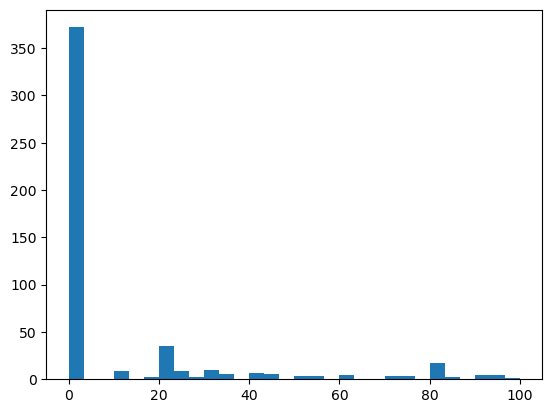

In [34]:
# Check normality of Column 'ZN'
plt.hist(whole_df['ZN'], bins=30)

(array([  7.,  28.,  21.,  44.,  20.,  31.,  35.,  23.,  39.,   0.,  29.,
         15.,   5.,   6.,   9.,   0.,   3.,   0.,   0., 132.,   0.,  30.,
          0.,  15.,   0.,   0.,   0.,   7.,   0.,   5.]),
 array([ 0.46      ,  1.36933333,  2.27866667,  3.188     ,  4.09733333,
         5.00666667,  5.916     ,  6.82533333,  7.73466667,  8.644     ,
         9.55333333, 10.46266667, 11.372     , 12.28133333, 13.19066667,
        14.1       , 15.00933333, 15.91866667, 16.828     , 17.73733333,
        18.64666667, 19.556     , 20.46533333, 21.37466667, 22.284     ,
        23.19333333, 24.10266667, 25.012     , 25.92133333, 26.83066667,
        27.74      ]),
 <BarContainer object of 30 artists>)

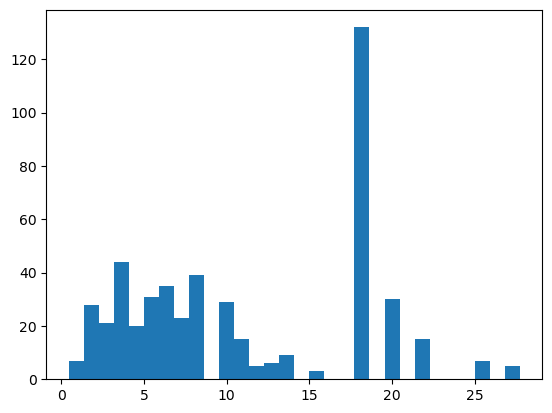

In [35]:
# # Check normality of Column 'INDUS'
plt.hist(whole_df['INDUS'], bins=30)

(array([14., 32., 29., 53., 20.,  6., 33., 29., 27., 40., 13.,  7., 30.,
        25., 22.,  5., 15., 10.,  8., 25., 24., 13.,  0.,  8.,  0.,  0.,
         0.,  0.,  0., 16.]),
 array([0.385 , 0.4012, 0.4174, 0.4336, 0.4498, 0.466 , 0.4822, 0.4984,
        0.5146, 0.5308, 0.547 , 0.5632, 0.5794, 0.5956, 0.6118, 0.628 ,
        0.6442, 0.6604, 0.6766, 0.6928, 0.709 , 0.7252, 0.7414, 0.7576,
        0.7738, 0.79  , 0.8062, 0.8224, 0.8386, 0.8548, 0.871 ]),
 <BarContainer object of 30 artists>)

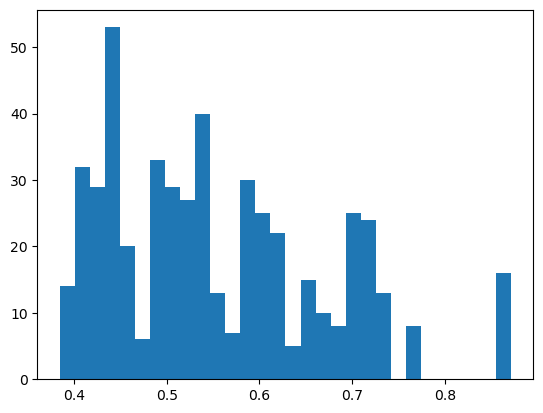

In [36]:
# # Check normality of Column 'NOX'
plt.hist(whole_df['NOX'], bins=30)

(array([29., 57., 64., 49., 39., 23., 32., 28., 21., 22., 14., 24., 12.,
        14., 20.,  8., 14.,  4., 13.,  2.,  4.,  4.,  3.,  0.,  0.,  2.,
         2.,  0.,  0.,  1.]),
 array([ 1.1296    ,  1.49616333,  1.86272667,  2.22929   ,  2.59585333,
         2.96241667,  3.32898   ,  3.69554333,  4.06210667,  4.42867   ,
         4.79523333,  5.16179667,  5.52836   ,  5.89492333,  6.26148667,
         6.62805   ,  6.99461333,  7.36117667,  7.72774   ,  8.09430333,
         8.46086667,  8.82743   ,  9.19399333,  9.56055667,  9.92712   ,
        10.29368333, 10.66024667, 11.02681   , 11.39337333, 11.75993667,
        12.1265    ]),
 <BarContainer object of 30 artists>)

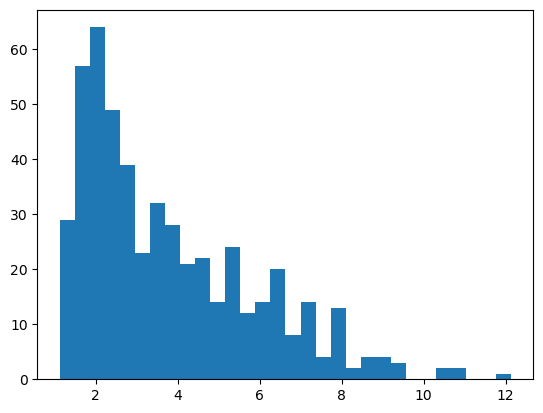

In [37]:
# # Check normality of Column 'DIS'
plt.hist(whole_df['DIS'], bins=30)

(array([ 20.,  23.,  38., 106.,   0., 114.,  26.,  17.,   0.,  24.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 132.]),
 array([ 1.        ,  1.76666667,  2.53333333,  3.3       ,  4.06666667,
         4.83333333,  5.6       ,  6.36666667,  7.13333333,  7.9       ,
         8.66666667,  9.43333333, 10.2       , 10.96666667, 11.73333333,
        12.5       , 13.26666667, 14.03333333, 14.8       , 15.56666667,
        16.33333333, 17.1       , 17.86666667, 18.63333333, 19.4       ,
        20.16666667, 20.93333333, 21.7       , 22.46666667, 23.23333333,
        24.        ]),
 <BarContainer object of 30 artists>)

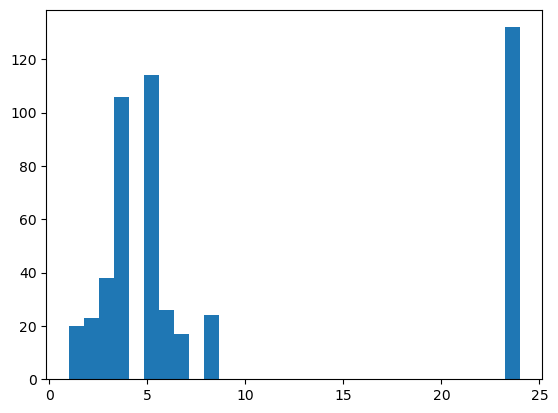

In [38]:
# Check normality of Column 'RAD'
plt.hist(whole_df['RAD'], bins=30)

In [26]:
# replace missing value with median
housing_df_median = whole_df.fillna(whole_df.median())

In [28]:
# Display the table 
first_20_rows = housing_df_median.head(20)
print(first_20_rows)

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900  1.0  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671  2.0  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671  2.0  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622  3.0  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622  3.0  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622  3.0  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605  5.0  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505  5.0  311   
8   0.21124   0.0   7.87     0  0.524  5.631  100.0  6.0821  5.0  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921  5.0  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467  5.0  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267  5.0  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [29]:
# Check missing values
housing_df_median.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [31]:
# Check shape of the table
housing_df_median.shape

(506, 14)